# Import Libraries

In [96]:

import pandas as pd
from typing import List

# label Enconder
from sklearn.preprocessing import LabelEncoder
# Scaling
from sklearn.preprocessing import MinMaxScaler
# splitting
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


import pandas as pd
from typing import List

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import timeit
import pickle


import warnings
warnings.filterwarnings("ignore")


# Load Dataset

In [49]:
# Load the dataset
file_path = "D:\Programming\College\ML\Project\Project\Milestone 2/Data\games-classification-dataset.csv"

dataset = pd.read_csv(file_path,
                      parse_dates=['Original Release Date','Current Version Release Date'], dayfirst=True)

In [50]:
dataset.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",2018-03-06,2019-07-31,Intermediate
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",2013-03-21,2017-06-28,Intermediate
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",2013-04-04,2015-04-21,High
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",2011-05-26,2019-07-23,Intermediate
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",2017-05-19,2019-02-06,High


In [51]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [52]:
description(dataset)

,Name,dtypes,Missing,Uniques
0,URL,object,0,5171
1,ID,int64,0,5171
2,Name,object,0,5171
3,Subtitle,object,3749,1399
4,Icon URL,object,0,5171
5,User Rating Count,int64,0,1410
6,Price,float64,0,17
7,In-app Purchases,object,2039,2052
8,Description,object,0,5099
9,Developer,object,0,3084


## Check Dublictes

In [53]:
# Count the number of duplicate rows
dataset.duplicated().sum() 

43

In [54]:
# Drop duplicate rows
dataset = dataset.drop_duplicates()

In [55]:
# Count the number of duplicate rows
dataset.duplicated().sum()

0

## Label Encoder

In [56]:
# Print the 'Name' and 'Gender' columns
dataset[['URL','Name','Subtitle','Icon URL','Description']].head()

,URL,Name,Subtitle,Icon URL,Description
0,https://apps.apple.com/us/app/heir-of-light/id...,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,"A Dark Fantasy, Collectible RPG\n\nDarkness ha..."
1,https://apps.apple.com/us/app/endgame-eurasia/...,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,"""This interactive experience is an exploration..."
2,https://apps.apple.com/us/app/free-solitaire/i...,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Same Solitaire game with classic Solitaire run...
3,https://apps.apple.com/us/app/draft-trainer/id...,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,** Discounted for a limited time **\n\nEver wo...
4,https://apps.apple.com/us/app/rogue-knight-inf...,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fight or sneak your way through hordes of mons...


In [57]:
def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X


#Feature Encoding
cols=('Name','URL','Icon URL','Description','Subtitle')
dataset=Feature_Encoder(dataset,cols)

In [58]:
# Print the 'Name' and 'Gender' columns
dataset[['URL','Name','Subtitle','Icon URL','Description']]

,URL,Name,Subtitle,Icon URL,Description
0,2336,2379,451,2526,2131
1,1710,1841,1394,3359,1581
2,2010,2123,1394,4863,4082
3,1582,1712,1394,491,1941
4,3839,3882,1154,1604,3053
...,...,...,...,...,...
5209,3568,3618,316,1288,378
5210,2610,85,14,348,935
5211,4713,4716,1394,433,1636
5212,2549,2652,1394,4252,584


In [59]:
dataset[['URL','ID','Subtitle','Icon URL','Name','Description']].nunique()

URL            5171
ID             5171
Subtitle       1400
Icon URL       5171
Name           5171
Description    5099
dtype: int64

In [60]:
#We deleted all theses columns because they are Unique (Non-Meaningful)
#Subtitle Column almost all cells are Nan values 
#So we will drop this Columns

Columns_To_Deleted = ['URL','ID','Subtitle','Icon URL','Name','Description']
dataset = dataset.drop(columns = Columns_To_Deleted)

In [61]:
dataset.isnull().sum()

User Rating Count                  0
Price                              0
In-app Purchases                2025
Developer                          0
Age Rating                         0
Languages                         11
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Rate                               0
dtype: int64

In [62]:
dataset[['In-app Purchases']]

,In-app Purchases
0,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ..."
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5209,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.99..."
5210,"2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19.99"
5211,NaN
5212,"9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9.9..."


In [63]:
# Convert each cell into a list of floats, and compute the mean of the list
dataset['In-app Purchases'] = dataset['In-app Purchases'].apply(lambda x: sum([float(i) for i in x.split(',')]) if pd.notnull(x) else x)
# Replace the missing values with the mean of the In-app Purchases column
mean_value = dataset['In-app Purchases'].mean()
dataset['In-app Purchases'] = dataset['In-app Purchases'].fillna(mean_value)

In [64]:
dataset[['In-app Purchases']]

,In-app Purchases
0,307.840000
1,61.674269
2,61.674269
3,61.674269
4,61.674269
...,...
5209,53.860000
5210,60.920000
5211,61.674269
5212,121.900000


In [65]:
dataset.isnull().sum()

User Rating Count                0
Price                            0
In-app Purchases                 0
Developer                        0
Age Rating                       0
Languages                       11
Size                             0
Primary Genre                    0
Genres                           0
Original Release Date            0
Current Version Release Date     0
Rate                             0
dtype: int64

In [66]:
dataset[['Languages']]

,Languages
0,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI"
1,EN
2,"EN, ZH"
3,EN
4,EN
...,...
5209,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES..."
5210,"EN, JA, KO"
5211,EN
5212,EN


In [68]:
# split the string values into lists of languages
Lang_temp = dataset['Languages'].str.split(',')
print(Lang_temp)
print("------------------------------------------------------------------------")

# use explode to convert the list column into separate rows
exploded_Lang = Lang_temp.explode()    #from 5214 to 20429
print(exploded_Lang)

# fill missing values with mode value
mode_value = exploded_Lang.mode()[0]
dataset['Languages'] = dataset['Languages'].fillna(value=mode_value)

0       [EN,  FR,  DE,  JA,  KO,  ZH,  ES,  TH,  ZH,  VI]
1                                                    [EN]
2                                               [EN,  ZH]
3                                                    [EN]
4                                                    [EN]
                              ...                        
5209    [EN,  FR,  DE,  IT,  JA,  KO,  NB,  PL,  PT,  ...
5210                                       [EN,  JA,  KO]
5211                                                 [EN]
5212                                                 [EN]
5213                                                 [EN]
Name: Languages, Length: 5171, dtype: object
------------------------------------------------------------------------
0        EN
0        FR
0        DE
0        JA
0        KO
       ... 
5210     JA
5210     KO
5211     EN
5212     EN
5213     EN
Name: Languages, Length: 20268, dtype: object


In [69]:
dataset.isnull().sum()

User Rating Count               0
Price                           0
In-app Purchases                0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Rate                            0
dtype: int64

In [70]:
dataset

,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,982,0.00,307.840000,GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",2018-03-06,2019-07-31,Intermediate
1,19,0.00,61.674269,Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",2013-03-21,2017-06-28,Intermediate
2,14,0.00,61.674269,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",2013-04-04,2015-04-21,High
3,88,1.99,61.674269,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",2011-05-26,2019-07-23,Intermediate
4,13,3.99,61.674269,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",2017-05-19,2019-02-06,High
...,...,...,...,...,...,...,...,...,...,...,...,...
5209,205014,0.99,53.860000,Ndemic Creations,12+,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",118793216,Games,"Games, Strategy, Simulation",2012-05-26,2019-02-08,High
5210,252,0.00,60.920000,"AFEEL, Inc.",4+,"EN, JA, KO",79267840,Games,"Games, Simulation, Strategy, Entertainment",2015-01-11,2018-04-16,High
5211,12,0.00,61.674269,Stasis Software LLC,4+,EN,19513344,Utilities,"Utilities, Games, Board, Strategy",2012-08-16,2017-02-21,High
5212,578,0.00,121.900000,ZEN Studios Ltd.,9+,EN,275680256,Games,"Games, Strategy, Role Playing",2016-06-08,2017-01-30,Intermediate


### Preproccessing Age Rating   (from 4+  to  4)

In [71]:
# Convert Age Rating to string and lowercase
dataset['Age Rating'] = dataset['Age Rating'].astype(str).str.lower()
# Rename column
dataset.rename(columns={'Age Rating': 'Min Age'}, inplace=True)
dataset['Min Age'] = dataset['Min Age'].str.replace('+','').astype(int)
dataset[['Min Age']]

,Min Age
0,12
1,12
2,4
3,9
4,12
...,...
5209,12
5210,4
5211,4
5212,9


## Preprocess Rate Column

In [75]:
dataset[["Rate"]]

,Rate
0,2
1,2
2,3
3,2
4,3
...,...
5209,3
5210,3
5211,3
5212,2


In [74]:
dataset["Rate"] = dataset["Rate"].replace({"Low": 1, "Intermediate": 2, "High": 3})

In [76]:
dataset[["Rate"]]

,Rate
0,2
1,2
2,3
3,2
4,3
...,...
5209,3
5210,3
5211,3
5212,2


### Convert Categorical Data to numeric based on Label(Average User Rating)

In [72]:

dataset[['Developer','Languages','Primary Genre','Genres']]

,Developer,Languages,Primary Genre,Genres
0,GAMEVIL Inc.,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",Games,"Games, Role Playing, Strategy"
1,Auroch Digital Ltd,EN,Games,"Games, Simulation, Strategy, News"
2,Chen Zhong Yuan,"EN, ZH",Games,"Games, Strategy, Entertainment, Card"
3,"GG Wizards, LLC",EN,Games,"Games, Utilities, Card, Strategy"
4,Luis Regueira,EN,Games,"Games, Role Playing, Strategy"
...,...,...,...,...
5209,Ndemic Creations,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",Games,"Games, Strategy, Simulation"
5210,"AFEEL, Inc.","EN, JA, KO",Games,"Games, Simulation, Strategy, Entertainment"
5211,Stasis Software LLC,EN,Utilities,"Utilities, Games, Board, Strategy"
5212,ZEN Studios Ltd.,EN,Games,"Games, Strategy, Role Playing"


### Enconding

In [77]:
dataset['Developer'] = dataset.groupby('Developer')['Rate'].transform(lambda x: x.mean())
dataset['Languages'] = dataset.groupby('Languages')['Rate'].transform(lambda x: x.mean())
dataset['Primary Genre'] = dataset.groupby('Primary Genre')['Rate'].transform(lambda x: x.mean())
dataset['Genres'] = dataset.groupby('Genres')['Rate'].transform(lambda x: x.mean())

In [78]:
dataset[['Developer','Languages','Primary Genre','Genres']]

,Developer,Languages,Primary Genre,Genres
0,2.500000,2.000000,2.417940,2.516667
1,2.000000,2.398240,2.417940,2.500000
2,2.666667,2.428571,2.417940,2.419355
3,2.000000,2.398240,2.417940,2.000000
4,3.000000,2.398240,2.417940,2.516667
...,...,...,...,...
5209,3.000000,3.000000,2.417940,2.362637
5210,2.375000,2.521739,2.417940,2.310345
5211,3.000000,2.398240,2.387097,3.000000
5212,2.500000,2.398240,2.417940,2.559322


In [79]:
# Convert the date columns to datetime format
StartDate = pd.to_datetime(dataset['Original Release Date'])
EndDate = pd.to_datetime(dataset['Current Version Release Date'])

# Create a new column with the difference in days between the two datesP
dataset['Days Since Release'] = (EndDate - StartDate).dt.days

# Drop the original date columns
dataset.drop(columns = ['Original Release Date', 'Current Version Release Date'], inplace=True)

dataset[['Days Since Release']]

,Days Since Release
0,512
1,1560
2,747
3,2980
4,628
...,...
5209,2449
5210,1191
5211,1650
5212,236


In [80]:
dataset

,User Rating Count,Price,In-app Purchases,Developer,Min Age,Languages,Size,Primary Genre,Genres,Rate,Days Since Release
0,982,0.00,307.840000,2.500000,12,2.000000,894489600,2.417940,2.516667,2,512
1,19,0.00,61.674269,2.000000,12,2.398240,116407296,2.417940,2.500000,2,1560
2,14,0.00,61.674269,2.666667,4,2.428571,50647040,2.417940,2.419355,3,747
3,88,1.99,61.674269,2.000000,9,2.398240,28120064,2.417940,2.000000,2,2980
4,13,3.99,61.674269,3.000000,12,2.398240,39915520,2.417940,2.516667,3,628
...,...,...,...,...,...,...,...,...,...,...,...
5209,205014,0.99,53.860000,3.000000,12,3.000000,118793216,2.417940,2.362637,3,2449
5210,252,0.00,60.920000,2.375000,4,2.521739,79267840,2.417940,2.310345,3,1191
5211,12,0.00,61.674269,3.000000,4,2.398240,19513344,2.387097,3.000000,3,1650
5212,578,0.00,121.900000,2.500000,9,2.398240,275680256,2.417940,2.559322,2,236


### Features & Labels

In [81]:
data_input = dataset.drop(columns = ['Rate'])  # Features
data_output = dataset['Rate']  # Label

### Kbest Feature Selection

In [82]:
def Kbest_feature_selection(k):
        # Separate features and labels
        features = dataset.drop(columns=['Rate'])
        label = dataset['Rate']

        # Apply feature selection using SelectKBest
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(features, label)


        # Get the selected feature names
        selected_feature_names = features.columns[selector.get_support()].tolist()
        # Update the features dataset with the selected features
        features = pd.DataFrame(data=X_selected, columns=selected_feature_names)

        return features, label

In [83]:
data_input,data_output = Kbest_feature_selection(5)

### PCA Feature Selection

In [84]:
def apply_pca(self):
        # Define the range of components to consider
        n_components_range = range(1, 9)

        # Create a PCA object
        pca = PCA()

        # Perform grid search to find the best number of components
        grid_search = GridSearchCV(pca, {'n_components': n_components_range})
        grid_search.fit(self.dataset.drop(columns=['Rate']))

        # Get the best number of components
        best_n_components = grid_search.best_params_['n_components']

        # Perform feature selection using PCA with the best number of components
        pca = PCA(n_components=best_n_components)
        features_selected = pca.fit_transform(self.dataset.drop(columns=['Rate']))

        # Create a new dataset with the selected features
        self.features = pd.DataFrame(data=features_selected)

In [85]:
data_input

,Developer,Languages,Size,Primary Genre,Genres
0,2.500000,2.000000,894489600.0,2.417940,2.516667
1,2.000000,2.398240,116407296.0,2.417940,2.500000
2,2.666667,2.428571,50647040.0,2.417940,2.419355
3,2.000000,2.398240,28120064.0,2.417940,2.000000
4,3.000000,2.398240,39915520.0,2.417940,2.516667
...,...,...,...,...,...
5166,3.000000,3.000000,118793216.0,2.417940,2.362637
5167,2.375000,2.521739,79267840.0,2.417940,2.310345
5168,3.000000,2.398240,19513344.0,2.387097,3.000000
5169,2.500000,2.398240,275680256.0,2.417940,2.559322


In [86]:
data_output

0       2
1       2
2       3
3       2
4       3
       ..
5209    3
5210    3
5211    3
5212    2
5213    2
Name: Rate, Length: 5171, dtype: int64

### Train & Test Split

In [87]:
# Split the data into train, test
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=0)


## BEFORE SCALING

In [88]:
X_train

,Developer,Languages,Size,Primary Genre,Genres
3628,3.000000,2.398240,15027200.0,2.529412,3.000000
2491,3.000000,2.398240,67420160.0,2.417940,2.500000
3262,1.000000,2.398240,10806272.0,2.417940,2.355556
2972,2.333333,3.000000,835738624.0,2.417940,2.307692
2481,3.000000,2.000000,150199296.0,2.417940,2.446429
...,...,...,...,...,...
4931,2.000000,2.207317,6614449.0,2.417940,2.527778
3264,3.000000,2.398240,99400704.0,2.417940,2.250000
1653,2.000000,2.398240,43083776.0,2.417940,2.513369
2607,3.000000,2.500000,171896832.0,2.417940,2.401163


### Feature Scaling using (StandardScaler)

In [ ]:
# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler to the training data
# scaler.fit(X_train)

# # Scale the training, validation, and test data
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Convert the scaled  data to a dataframe
# X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
# X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

### Feature Scaling using (MinMaxScaler)


In [89]:
#Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training, validation, and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled  data to a dataframe
X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

### AFTER SCALING

In [90]:
X_train

,Developer,Languages,Size,Primary Genre,Genres
0,1.000000,0.699120,0.003782,0.686275,1.000000
1,1.000000,0.699120,0.017159,0.611960,0.750000
2,0.000000,0.699120,0.002704,0.611960,0.677778
3,0.666667,1.000000,0.213335,0.611960,0.653846
4,1.000000,0.500000,0.038296,0.611960,0.723214
...,...,...,...,...,...
4131,0.500000,0.603659,0.001634,0.611960,0.763889
4132,1.000000,0.699120,0.025325,0.611960,0.625000
4133,0.500000,0.699120,0.010946,0.611960,0.756684
4134,1.000000,0.750000,0.043836,0.611960,0.700581


In [91]:
train_Time = []
train_accurices = []

In [92]:
 #########################Logistic Regression############################

log_C_values = [0.1, 1, 10]
solvers = ['sag', 'liblinear', 'lbfgs']
logreg_models = {}
print("-------------------Logistic Regression-------------------")

for sol in solvers:
        for C in log_C_values:
            start = timeit.default_timer()
            logreg = LogisticRegression(solver=sol, C=C)
            logreg.fit(X_train, y_train)
            end = timeit.default_timer()
            train_Time.append(end-start)
            y_pred = logreg.predict(X_test)

            logaccuracy = accuracy_score(y_test, y_pred)
            train_accurices.append(logaccuracy)
            logmodel_name = f'{sol}_{C}'
            logreg_models[logmodel_name] = (logreg, logaccuracy)

            print(f"Solver: {sol}, C: {C}")
            print("----------------------------")
            print("Accuracy score:", logaccuracy)

-------------------Logistic Regression-------------------
Solver: sag, C: 0.1
----------------------------
Accuracy score: 0.8830917874396135
Solver: sag, C: 1
----------------------------
Accuracy score: 0.8917874396135266
Solver: sag, C: 10
----------------------------
Accuracy score: 0.893719806763285
Solver: liblinear, C: 0.1
----------------------------
Accuracy score: 0.8338164251207729
Solver: liblinear, C: 1
----------------------------
Accuracy score: 0.8396135265700483
Solver: liblinear, C: 10
----------------------------
Accuracy score: 0.8917874396135266
Solver: lbfgs, C: 0.1
----------------------------
Accuracy score: 0.8830917874396135
Solver: lbfgs, C: 1
----------------------------
Accuracy score: 0.8917874396135266
Solver: lbfgs, C: 10
----------------------------
Accuracy score: 0.893719806763285


In [97]:
 #########################SVM############################

kernel_values = ['linear', 'rbf', 'sigmoid']
SVM_C_values = [0.1, 1, 10]
svm_models = {}

print("-------------------SVM-------------------")

for kernel in kernel_values:
        for C in SVM_C_values:
            start = timeit.default_timer()
            svm = SVC(kernel=kernel, C=C)
            svm.fit(X_train, y_train)
            end = timeit.default_timer()
            train_Time.append(end-start)
            y_pred = svm.predict(X_test)

            svmaccuracy = accuracy_score(y_test, y_pred)
            train_accurices.append(svmaccuracy)
            
            svmmodel_name = f'{kernel}_{C}'
            svm_models[svmmodel_name] = (svm, svmaccuracy)

            print(f"Kernel: {kernel}, C: {C}")
            print("----------------------------")
            
            print("Accuracy score:", svmaccuracy)


-------------------SVM-------------------
Kernel: linear, C: 0.1
----------------------------
Accuracy score: 0.8888888888888888
Kernel: linear, C: 1
----------------------------
Accuracy score: 0.8966183574879227
Kernel: linear, C: 10
----------------------------
Accuracy score: 0.8966183574879227
Kernel: rbf, C: 0.1
----------------------------
Accuracy score: 0.8946859903381642
Kernel: rbf, C: 1
----------------------------
Accuracy score: 0.8966183574879227
Kernel: rbf, C: 10
----------------------------
Accuracy score: 0.8917874396135266
Kernel: sigmoid, C: 0.1
----------------------------
Accuracy score: 0.49468599033816424
Kernel: sigmoid, C: 1
----------------------------
Accuracy score: 0.4144927536231884
Kernel: sigmoid, C: 10
----------------------------
Accuracy score: 0.08888888888888889


In [98]:
#############################Naive Bayes################################

var_smoothing_values = [1e-9, 1e-7, 1e-5]
priors = [None, [0.3, 0.3, 0.4], [0.3, 0.3, 0.4]]
NB_models = {}

print("-------------------Naive Bayes-------------------")

for prior in priors:
        for var_smoothing in var_smoothing_values:
            nb = GaussianNB(var_smoothing=var_smoothing, priors=prior)

            # Fit the model on the training data
            nb.fit(X_train, y_train)

            # Predict on the test data
            y_pred = nb.predict(X_test)

            # Calculate accuracy score and mean squared error
            NBaccuracy = accuracy_score(y_test, y_pred)
            
            NBmodel_name = f'{prior}_{var_smoothing}'
            NB_models[NBmodel_name] = (nb, NBaccuracy)

            print(f"Priors: {prior}, Var smoothing: {var_smoothing}")
            print("----------------------------")       
            print("Accuracy score:", NBaccuracy)


-------------------Naive Bayes-------------------
Priors: None, Var smoothing: 1e-09
----------------------------
Accuracy score: 0.8714975845410629
Priors: None, Var smoothing: 1e-07
----------------------------
Accuracy score: 0.8714975845410629
Priors: None, Var smoothing: 1e-05
----------------------------
Accuracy score: 0.8714975845410629
Priors: [0.3, 0.3, 0.4], Var smoothing: 1e-09
----------------------------
Accuracy score: 0.8705314009661835
Priors: [0.3, 0.3, 0.4], Var smoothing: 1e-07
----------------------------
Accuracy score: 0.8705314009661835
Priors: [0.3, 0.3, 0.4], Var smoothing: 1e-05
----------------------------
Accuracy score: 0.8705314009661835
Priors: [0.3, 0.3, 0.4], Var smoothing: 1e-09
----------------------------
Accuracy score: 0.8705314009661835
Priors: [0.3, 0.3, 0.4], Var smoothing: 1e-07
----------------------------
Accuracy score: 0.8705314009661835
Priors: [0.3, 0.3, 0.4], Var smoothing: 1e-05
----------------------------
Accuracy score: 0.8705314009

In [99]:
    ################### Decision Tree #######################   
max_depth_values = [2, 5, 10]
min_samples_split_values = [2, 5, 10]
criterion_values = ['gini', 'entropy']
dt_models = {}

print("-------------------Decision Tree-------------------")

for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for criterion in criterion_values:
                dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)

                dt.fit(X_train, y_train)
                y_pred = dt.predict(X_test)

                dt_accuracy = accuracy_score(y_test, y_pred)
                dt_model_name = f'{max_depth}_{min_samples_split}_{criterion}'
                dt_models[dt_model_name] = (dt, dt_accuracy)

                print(f"Max depth: {max_depth}, Min samples split: {min_samples_split}, Criterion: {criterion}")
                print("----------------------------")
                print("Accuracy score:", dt_accuracy)

-------------------Decision Tree-------------------
Max depth: 2, Min samples split: 2, Criterion: gini
----------------------------
Accuracy score: 0.8792270531400966
Max depth: 2, Min samples split: 2, Criterion: entropy
----------------------------
Accuracy score: 0.8743961352657005
Max depth: 2, Min samples split: 5, Criterion: gini
----------------------------
Accuracy score: 0.8792270531400966
Max depth: 2, Min samples split: 5, Criterion: entropy
----------------------------
Accuracy score: 0.8743961352657005
Max depth: 2, Min samples split: 10, Criterion: gini
----------------------------
Accuracy score: 0.8792270531400966
Max depth: 2, Min samples split: 10, Criterion: entropy
----------------------------
Accuracy score: 0.8743961352657005
Max depth: 5, Min samples split: 2, Criterion: gini
----------------------------
Accuracy score: 0.8792270531400966
Max depth: 5, Min samples split: 2, Criterion: entropy
----------------------------
Accuracy score: 0.8724637681159421
Max de

In [101]:
class GraphPlotter:
    def __init__(self, accuracies, train_times, test_times, hyperparameters):
        self.accuracies = accuracies
        self.train_times = train_times
        self.test_times = test_times
        self.hyperparameters = hyperparameters

    def plot_accuracy(self):
        plt.figure(figsize=(10, 10))  # Set the figure size to 8x6 inches
        plt.bar(self.hyperparameters, self.accuracies)
        plt.title('Classification Accuracy')
        plt.xlabel('Hyperparameters')
        plt.ylabel('Accuracy')
        plt.show()

    def plot_train_time(self):
        plt.figure(figsize=(10, 10))  # Set the figure size to 8x6 inches
        plt.bar(self.hyperparameters, self.train_times)
        plt.title('Total Training Time')
        plt.xlabel('Hyperparameters')
        plt.ylabel('Time (seconds)')
        plt.show()

    def plot_test_time(self):
        plt.figure(figsize=(10, 10))  # Set the figure size to 8x6 inches
        plt.bar(self.hyperparameters, self.test_times)
        plt.title('Total Test Time')
        plt.xlabel('Hyperparameters')
        plt.ylabel('Time (seconds)')
        plt.show()

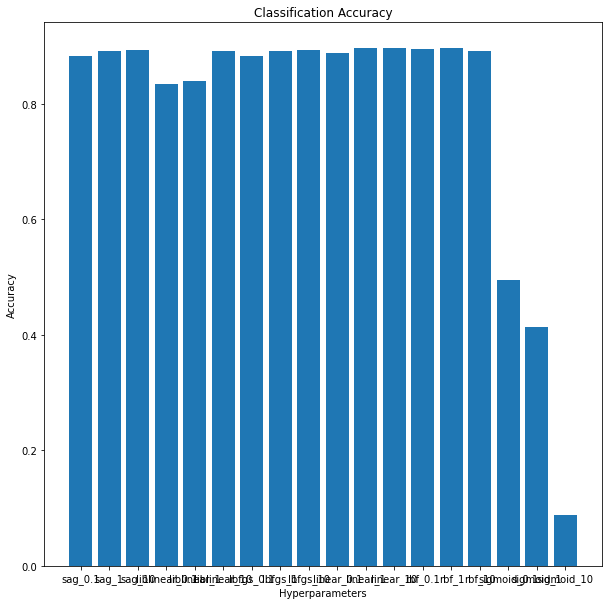

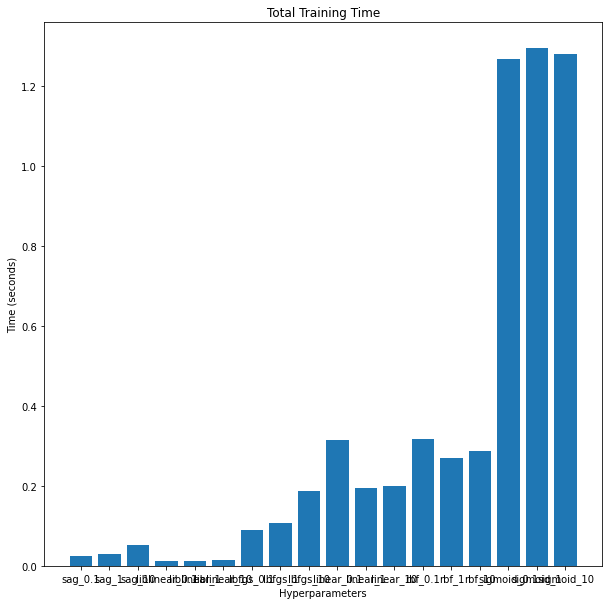

In [102]:
    #------------------------------------------------------------------------------
    hyperparameters = ['sag_0.1', 'sag_1', 'sag_10', 'liblinear_0.1', 'liblinear_1', 'liblinear_10', 'lbfgs_0.1', 'lbfgs_1', 'lbfgs_10','linear_0.1', 'linear_1', 'linear_10', 'rbf_0.1', 'rbf_1', 'rbf_10', 'sigmoid_0.1', 'sigmoid_1', 'sigmoid_10']


    # Create an instance of the GraphPlotter class
    plotter = GraphPlotter(train_accurices, train_Time, 0, hyperparameters)

    # Plot the accuracy scores
    plotter.plot_accuracy()

    # Plot the total training times
    plotter.plot_train_time()